In [1]:
from GFM_utilities import *

Start by reading a few CFM surfaces

Processing file PNRA-ELSZ-CHNO-Chino_fault_Central_Ave-CFM4_2000m.ts
Processing file GRFS-GRFZ-EAST-Garlock_fault-CFM5_2000m.ts
Processing file GRFS-GRFZ-WEST-Garlock_fault-CFM5_2000m.ts
Processing file SAFS-SAFZ-CRRZ-San_Andreas_fault-CFM6_2000m.ts


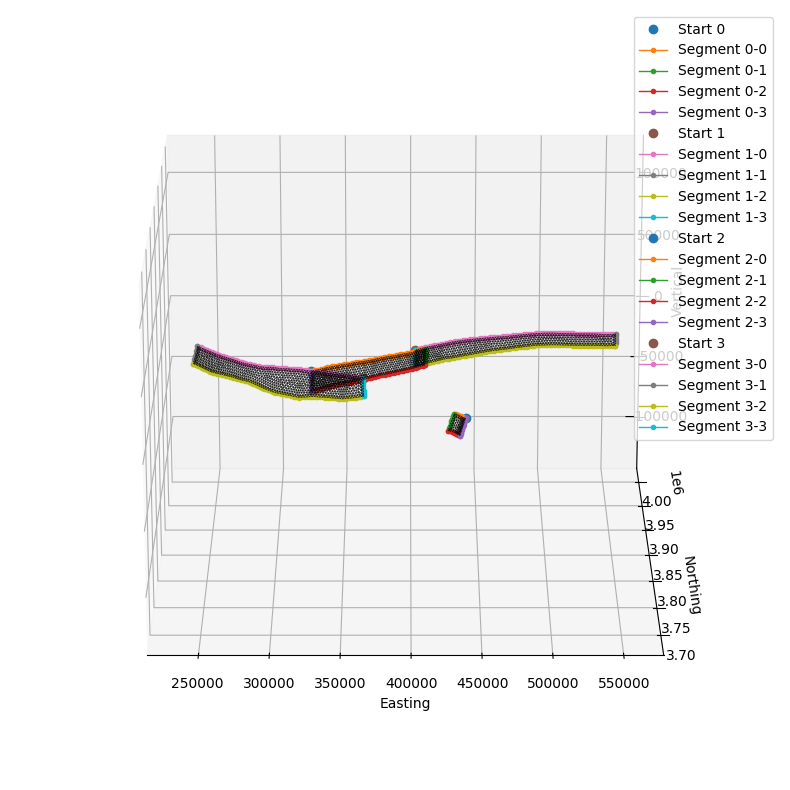

In [2]:
# Convert tsurf to trimesh
file_list = []

file_list.append("PNRA-ELSZ-CHNO-Chino_fault_Central_Ave-CFM4_2000m.ts")
file_list.append("GRFS-GRFZ-EAST-Garlock_fault-CFM5_2000m.ts")
file_list.append("GRFS-GRFZ-WEST-Garlock_fault-CFM5_2000m.ts")
file_list.append("SAFS-SAFZ-CRRZ-San_Andreas_fault-CFM6_2000m.ts")

CFM = []
nb_files = len(file_list)
for i in range(nb_files):
    CFM_surface = read_CFM(file_list[i])
    CFM.append(CFM_surface)

fig, ax = CFM_view(CFM, 20, -90)

Demonstration of CFM_join: Link the 2 Garlock Fault segments.

In [3]:
# join Two Garlock fault segments
Edge0 = CFM[1].segments[3]
Edge1 = CFM[2].segments[1]

CFM_surface = CFM_join(Edge0, Edge1)

if len(CFM) == 4:
    CFM.append(CFM_surface)
else:
    CFM[4] = CFM_surface

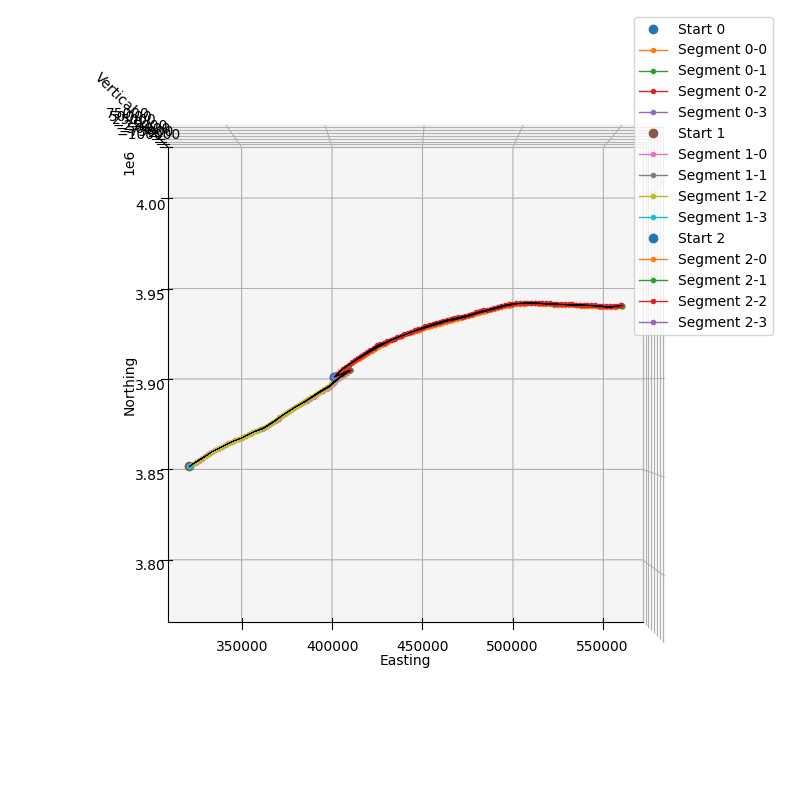

In [4]:
fig, ax = CFM_view([CFM[1], CFM[2], CFM[4]], 90, -90)
ax.set_xlim([390000, 410000])
ax.figure.canvas.draw()

Demonstration of "cutting": Cut San Andreas close to Garlock. Take a close look at the segment that should be added to Garlock.

In [5]:
# Cut SAF at Garlock West
SAF_south, SAF_north, Link_surface = CFM_Tjunction(CFM[3], CFM[2].segments[3])
if len(CFM) == 5:
    CFM.append(SAF_south)
    CFM.append(SAF_north)
    CFM.append(Link_surface)
else:
    CFM[5] = SAF_south
    CFM[6] = SAF_north
    CFM[7] = Link_surface


First surface is South
Minimum surface distance: 1.1523873194707034e-10


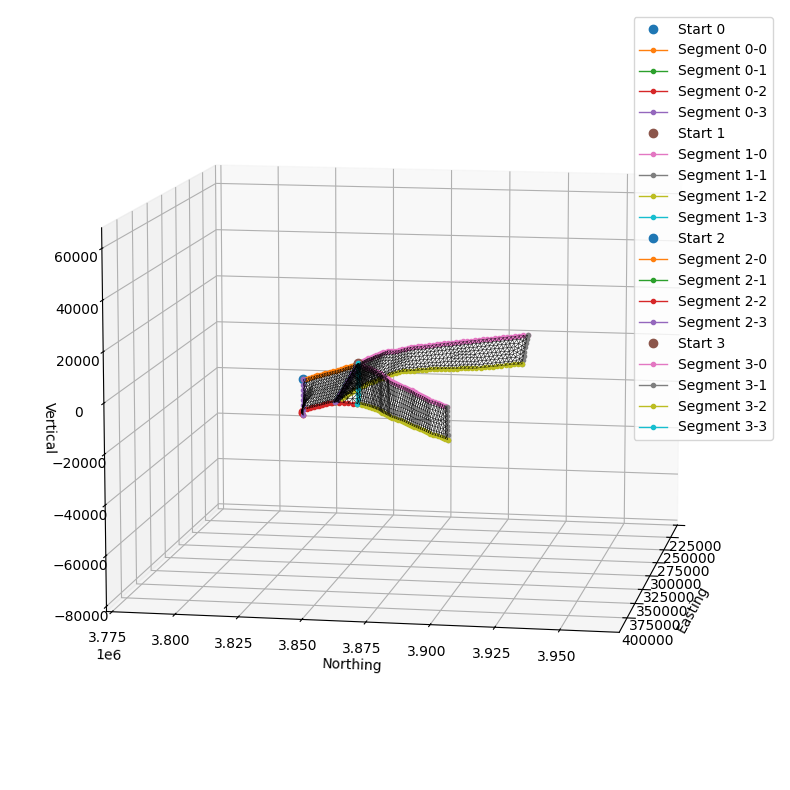

In [6]:
to_plot = [CFM[5], CFM[6], CFM[7], CFM[2]]
fig, ax = CFM_view(to_plot, 10, 10)

Add the new segment to Garlock

In [7]:
MergedGarlock = CFM_merge(CFM[2], CFM[7])

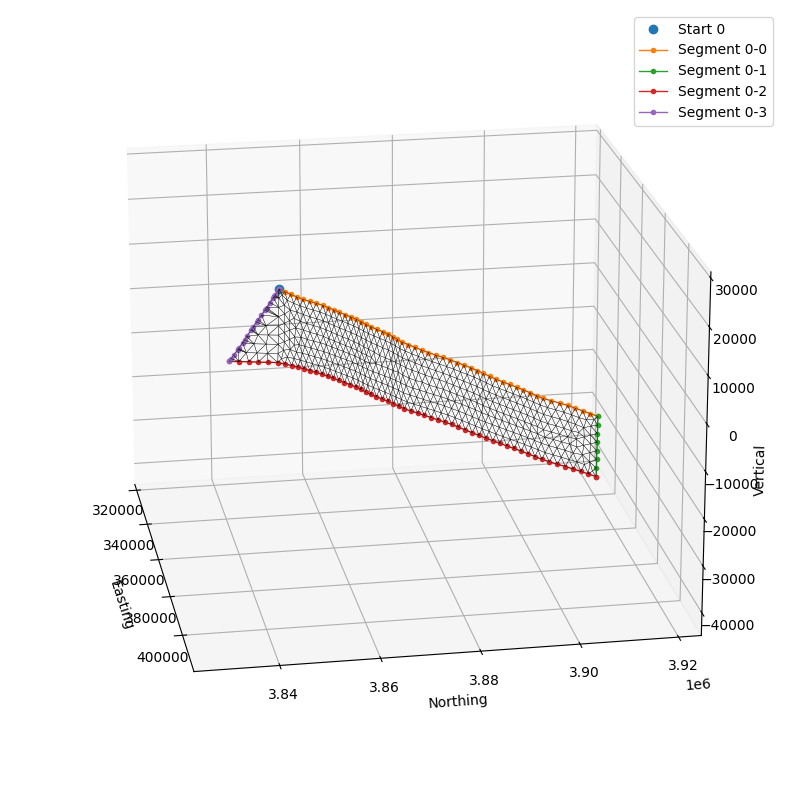

(<Figure size 1000x1000 with 1 Axes>,
 <Axes3D: xlabel='Easting', ylabel='Northing', zlabel='Vertical'>)

In [8]:
CFM_view([MergedGarlock], 20, -10)
